<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/OSA_Using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

**Reading the data**

In [106]:
# Importing the datasets
df     = pd.read_csv('OSA_Data_April_2023_1.csv')

**Display the data**

In [107]:
df.shape

(1000, 8)

**Display sample data**

In [108]:
df.head()

,Age,Sex,Height,Weight,BMI,Neck,MF,OSA
0,49,0,66.0,127,0,0,0,0
1,42,0,66.0,165,0,0,0,0
2,58,1,68.0,138,0,0,0,0
3,44,0,60.0,118,0,0,0,0
4,55,0,64.0,136,0,0,0,0


In [109]:
# Drop rows with any NaN values
df = df.dropna()

In [110]:
ones_count = df['OSA'].value_counts()[1]
print(ones_count)

565


In [111]:
zeros_count = (df['OSA'] == 0).sum()
print(zeros_count)

435


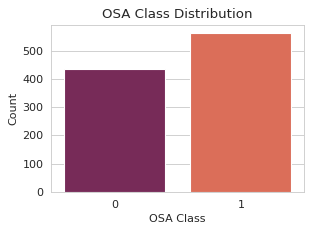

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Disable LaTeX rendering if enabled
plt.rcParams['text.usetex'] = False

fig = plt.figure(figsize=(4, 3), dpi=80)

# Use 'rocket' color palette for the bars
sns.countplot(data=df, x='OSA', hue='OSA', palette='rocket', legend=False)

plt.xlabel('OSA Class')
plt.ylabel('Count')
plt.title('OSA Class Distribution')

plt.tight_layout()
plt.savefig('classes.png', dpi=100)
plt.show()


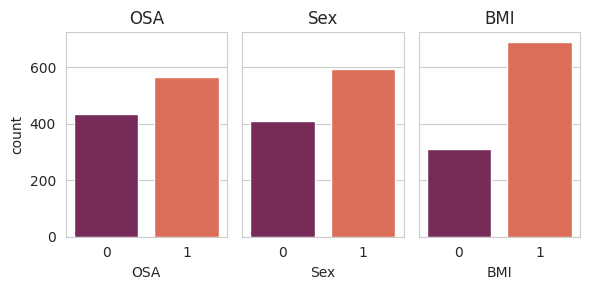

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['text.usetex'] = False

fig, axes = plt.subplots(1, 3, figsize=(6, 3), sharey=True)

sns.countplot(ax=axes[0], data=df, x='OSA', hue='OSA', palette='rocket', legend=False)
axes[0].set_title('OSA')

sns.countplot(ax=axes[1], data=df, x='Sex', hue='Sex', palette='rocket', legend=False)
axes[1].set_title('Sex')

sns.countplot(ax=axes[2], data=df, x='BMI', hue='BMI', palette='rocket', legend=False)
axes[2].set_title('BMI')

plt.tight_layout()
plt.savefig('Statistics.png', dpi=100)
plt.show()


**Correlation between different variables**

In [114]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='OSA', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['OSA'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 OSA       1
Neck      2
Weight    3
BMI       4
Sex       5
MF        6
Height    7
Age       8
Name: OSA, dtype: int64


**Oversampling**

In [115]:
from imblearn.over_sampling import RandomOverSampler

# Assuming your DataFrame is called `df` and the target variable is called `Prediction`
X = df.drop('OSA', axis=1)
y = df['OSA']

# Instantiate a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled X and y into a new DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)


In [116]:
df.shape

(1130, 8)

In [117]:
# # example of random undersampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# # The class can be used just like the RandomOverSampler class in the
# # previous section, except the strategies impact the majority class
# # instead of the minority class. For example, setting the sampling_strategy
# # argument to “majority” will oversample the majority class determined
# # by the class with the largest number of examples.

# # define Oversample strategy
# oversample = RandomOverSampler(sampling_strategy='not majority')
# x_over, y_over = oversample.fit_resample(x_data,y_data)

**Preparing data for DL classifier**



In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['OSA'], axis=1),
                                                    df['OSA'],
                                                    test_size=0.25,
                                                    random_state=42)

**Feature selection**

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

#======================================
# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance.
selector  = SelectKBest(f_classif, k=7)
#======================================

x_train    = selector.fit_transform(X_train, Y_train)
x_test     = selector.transform(X_test)

y_train = Y_train
y_test  = Y_test

In [120]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

print(selected_feature_names)

Index(['Age', 'Sex', 'Height', 'Weight', 'BMI', 'Neck', 'MF'], dtype='object')


In [121]:
# sns.pairplot(df, vars=['Weight (lb)', 'BAN', 'AHI','OSA'])
# plt.savefig('Correction with OSA.png')

In [122]:
X_train[selected_feature_names].head()

,Age,Sex,Height,Weight,BMI,Neck,MF
652,45,1,73.0,284,1,1,1
939,71,0,59.0,192,1,0,0
319,51,1,77.0,280,1,1,1
626,41,1,66.0,180,0,1,0
808,85,0,59.0,178,1,1,1


**Scaling the data**

In [123]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

def calculate_confusion(clf_name, y_train, y_pred_train, y_test, y_pred_test):

    # Calculate accuracy, precision, recall, and F1 score for training and testing sets
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)

    # Calculate the confusion matrix for training and testing sets
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Create a 1x2 figure with the confusion matrix on the left and evaluation metrics on the right
    fig, axs = plt.subplots(1, 2, figsize=(6,2),sharey=True)

    # Plot the confusion matrix for training set
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', ax=axs[0],annot_kws={"size": 10})
    axs[0].set_title('Training Set Confusion Matrix',fontsize=8)
    axs[0].set_xlabel('Predicted Labels',fontsize=8)
    axs[0].set_ylabel('True Labels',fontsize=8)

    # Plot the confusion matrix for testing set
    sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', ax=axs[1],annot_kws={"size": 10})
    axs[1].set_title('Testing Set Confusion Matrix',fontsize=8)
    axs[1].set_xlabel('Predicted Labels',fontsize=8)
    axs[1].set_ylabel('True Labels',fontsize=8)

    # Add a main title to the figure
    fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=11, y=1.05)
    plt.savefig(clf_name + ".png")
    # Show the plot
    plt.show()

    # Define the performance metrics for training and testing cases
    train_metrics = ["Train Accuracy", "Train Precision", "Train Recall", "Train F1"]
    test_metrics = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]

    # Create a list of lists containing the metrics
    table = [train_metrics + test_metrics,
         [train_acc, train_prec, train_rec, train_f1, test_acc, test_prec, test_rec, test_f1]]

    # Print the table
    print('-----Results for',clf_name,'----------------------')
    print(tabulate(table, headers='firstrow'))